# Financial Prediction

## Do The imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import riskfolio as rpf
from prophet import Prophet
import gradio

## Gradio Input

In [2]:
start = "2012-01-01" #input gradio
end = "2019-12-31"  #input gradio
tickers_list = ["TSLA","GOOGL","AAPL", "FPE"]  #input gradio
analyze_start_date = "2018-01-01" #input gradio
dict_resample = {"yearly" : "Y", "monthly" : "M", "weekly" : "W","daily" : "D"}
resample_period = "monthly" #input gradio
periods = 24    #input gradio
ticker_market_price_chart = "AAPL"  #input gradio

## Download Data

In [3]:
data = yf.download(tickers_list, start = start, end = end)
data = data.loc[:,("Adj Close")]
data = data.reset_index()

[*********************100%***********************]  4 of 4 completed


## Prepare the Data

In [4]:
#analyze_start_data = data[data.index == data[data["Date"] <= analyze_start_date].index[-1]]
data_resample = data.resample(dict_resample[resample_period], on = "Date").last()
data_resample = data_resample.dropna()
#data_resample = data_resample.reset_index()

data_tickers_optimisation_past_save = data_resample[data_resample["Date"]<analyze_start_date]
data_tickers_optimisation_overall_save = data_resample.copy()

data_tickers_prediction_optimisation_overall_save = pd.DataFrame()

## Make Predictions

In [5]:
for ticker in tickers_list : 

    data_ticker_model = data_resample[data_resample["Date"] < analyze_start_date][["Date",ticker]].rename(columns = {"Date" : "ds", ticker : "y"})

    model = Prophet()
    model.fit(data_ticker_model)
    futur = model.make_future_dataframe(periods = periods , freq = dict_resample[resample_period])
    data_ticker_prediction = model.predict(futur)
    
    #model.plot(data_ticker_prediction,uncertainty=True)
    #model.plot_components(data_ticker_prediction)

    data_ticker_prediction = data_ticker_prediction[data_ticker_prediction["ds"] >= analyze_start_date][["ds","yhat"]].rename(columns = {"ds" : "Date", "yhat": f"{ticker} prediction"})

    data_ticker_prediction = pd.concat([data_tickers_optimisation_past_save.rename(columns = { ticker : f"{ticker} prediction"})[["Date",f"{ticker} prediction"]],
                                        data_ticker_prediction], ignore_index = True)

    if "Date" in data_tickers_prediction_optimisation_overall_save.columns : 
        data_tickers_prediction_optimisation_overall_save[f"{ticker} prediction"] = data_ticker_prediction[f"{ticker} prediction"]
    else :
        data_tickers_prediction_optimisation_overall_save = data_ticker_prediction

15:05:47 - cmdstanpy - INFO - Chain [1] start processing
15:05:47 - cmdstanpy - INFO - Chain [1] done processing
15:05:48 - cmdstanpy - INFO - Chain [1] start processing
15:05:48 - cmdstanpy - INFO - Chain [1] done processing
15:05:49 - cmdstanpy - INFO - Chain [1] start processing
15:05:49 - cmdstanpy - INFO - Chain [1] done processing
15:05:50 - cmdstanpy - INFO - Chain [1] start processing
15:05:50 - cmdstanpy - INFO - Chain [1] done processing


## Draw Ticker Market Price Chart

In [6]:
#plt.figure(figsize = (10,6))
#plt.title(f"Market Price : {ticker_market_price_chart} actual and {ticker_market_price_chart} prediction evolution")
#plt.axvline(x = datetime.datetime.strptime(analyze_start_date,"%Y-%M-%d"), color = "black", linestyle = "dashed")
#plt.plot(data_tickers_prediction_optimisation_overall_save["Date"],data_tickers_prediction_optimisation_overall_save[f"{ticker_market_price_chart} prediction"],
#        color="red",label=f"{ticker_market_price_chart} prediction")
#plt.plot(data_resample["Date"],data_resample[ticker_market_price_chart],color = "blue", label = f"{ticker_market_price_chart} actual")
#plt.yscale(value = "log")
#plt.xlabel("Time")
#plt.ylabel("Price (log[10] scale)")
#plt.legend(loc = "upper left")
#plt.show()

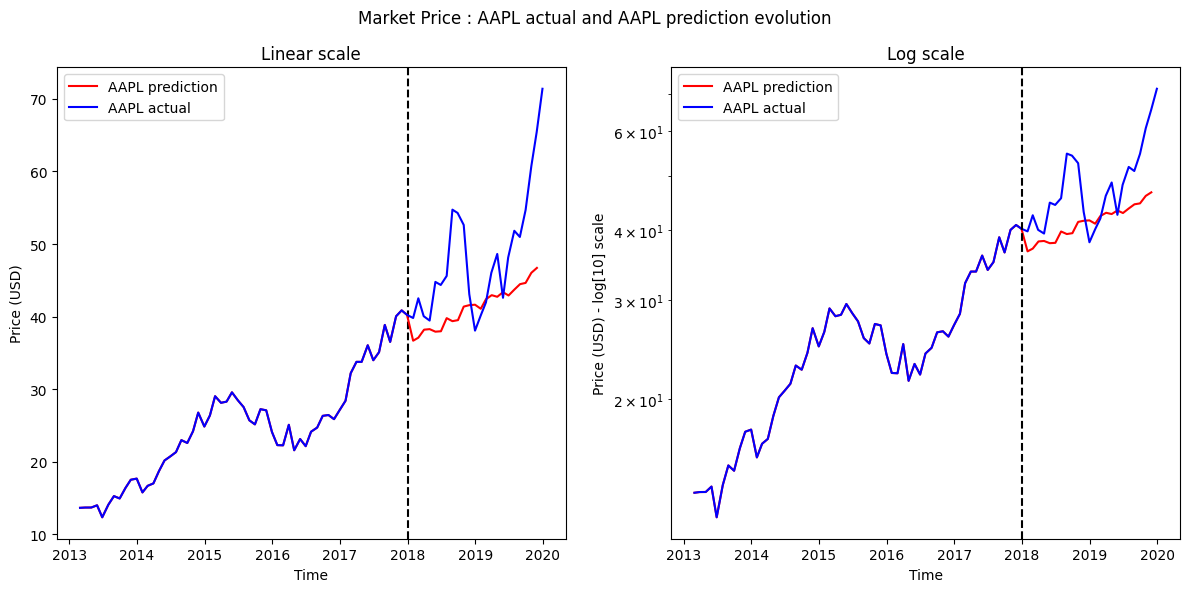

In [7]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (12,6))
ax1.axvline(x = datetime.datetime.strptime(analyze_start_date,"%Y-%M-%d"), color = "black", linestyle = "dashed")
ax1.plot(data_tickers_prediction_optimisation_overall_save["Date"],data_tickers_prediction_optimisation_overall_save[f"{ticker_market_price_chart} prediction"],
        color="red",label=f"{ticker_market_price_chart} prediction")
ax1.plot(data_resample["Date"],data_resample[ticker_market_price_chart],color = "blue", label = f"{ticker_market_price_chart} actual")
ax1.set_title("Linear scale")
ax1.set_ylabel("Price (USD)")
ax1.set_xlabel("Time")
ax1.legend(loc = "upper left")

ax2.plot(data_tickers_prediction_optimisation_overall_save["Date"],data_tickers_prediction_optimisation_overall_save[f"{ticker_market_price_chart} prediction"],
        color="red",label=f"{ticker_market_price_chart} prediction")
ax2.plot(data_resample["Date"],data_resample[ticker_market_price_chart],color = "blue", label = f"{ticker_market_price_chart} actual")
ax2.set_yscale("log")
ax2.axvline(x = datetime.datetime.strptime(analyze_start_date,"%Y-%M-%d"), color = "black", linestyle = "dashed")
ax2.set_title("Log scale")
ax2.set_ylabel("Price (USD) - log[10] scale")
ax2.set_xlabel("Time")
ax2.legend(loc = "upper left")

fig.suptitle(f"Market Price : {ticker_market_price_chart} actual and {ticker_market_price_chart} prediction evolution")
fig.tight_layout(w_pad=2.0)
plt.show()

## Portfolio Tickers Past Optimisation 

/home/tania/becode/time-series/venv/lib/python3.10/site-packages/riskfolio/PlotFunctions.py:569: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


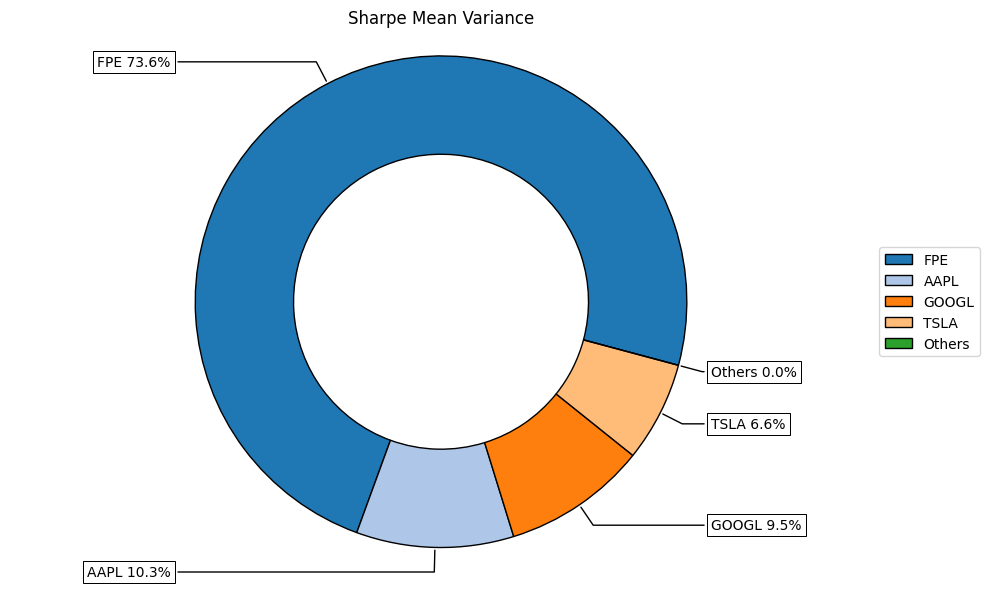

In [8]:
data_tickers_optimisation_past = data_tickers_optimisation_past_save.copy()
data_tickers_optimisation_past[data_tickers_optimisation_past.columns.drop("Date")] = data_tickers_optimisation_past[data_tickers_optimisation_past.columns.drop("Date")].pct_change()
data_tickers_optimisation_past = data_tickers_optimisation_past.dropna()
data_tickers_optimisation_past = data_tickers_optimisation_past.set_index("Date")

portfolio = rpf.Portfolio(returns = data_tickers_optimisation_past)
method_mu="hist" 
method_cov="hist"
portfolio.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.95)
model="Classic" # + "BL" --> list and loop over
rm = "MV" # + "SLPM" --> list and loop over
obj = "Sharpe"
hist = True
rf = 0
l = 0
tickers_weight_past = portfolio.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
ax1 = rpf.plot_pie(w=tickers_weight_past, title="Sharpe Mean Variance", others=0.01, nrow=20, cmap = "tab20", height=6, width=10, ax=None)

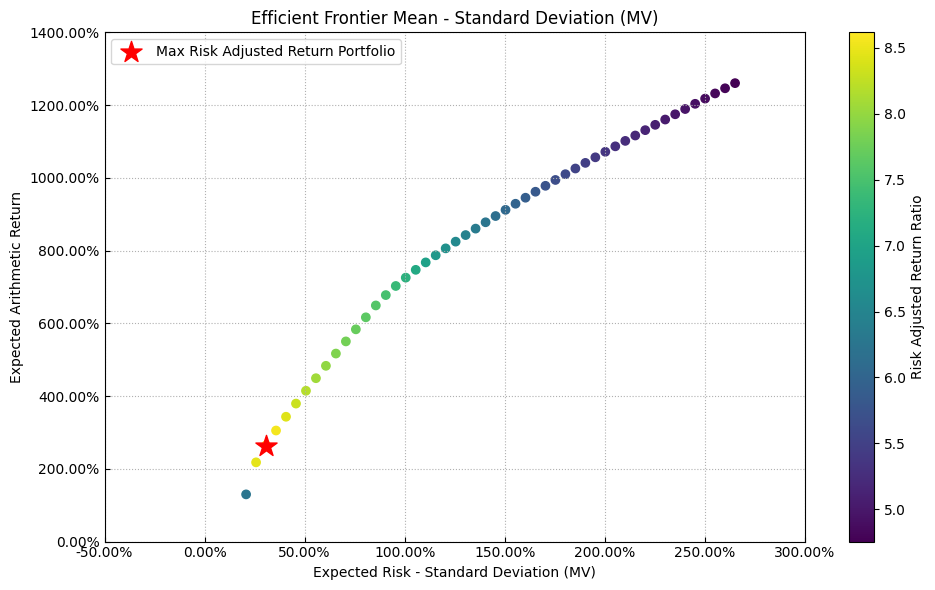

In [9]:
points = 50
frontier = portfolio.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
label = 'Max Risk Adjusted Return Portfolio'
mu = portfolio.mu
cov = portfolio.cov
returns = portfolio.returns
ax2 = rpf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05, cmap='viridis', w=tickers_weight_past, 
                        label=label, marker='*', s=16, c='r', height=6, width=10, ax=None)

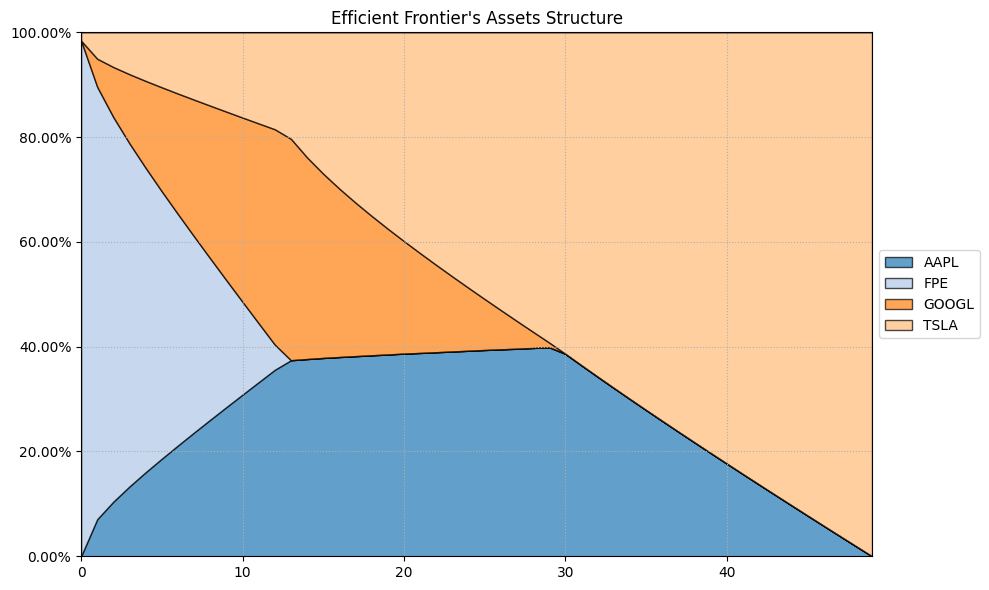

In [10]:
ax3 = rpf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

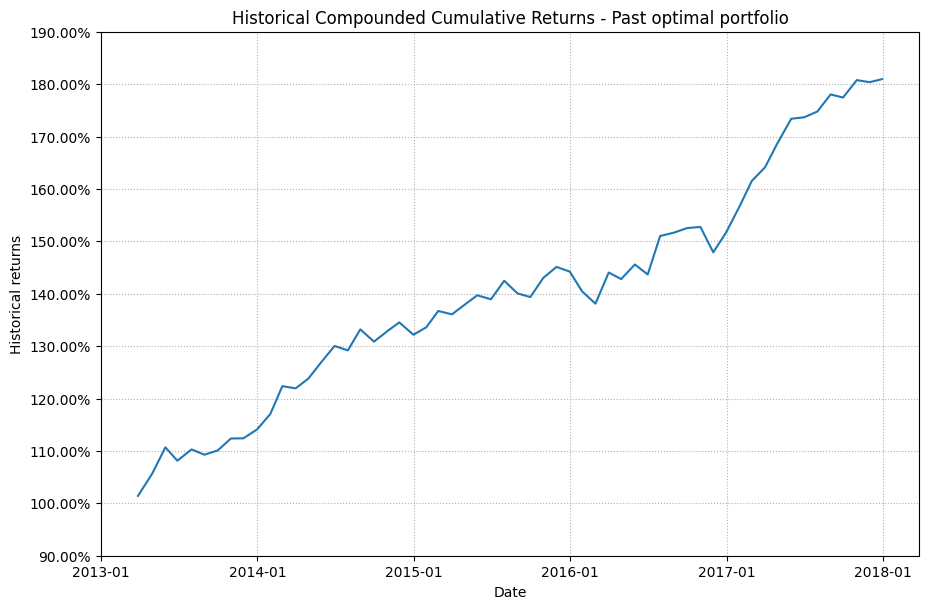

In [11]:
# Create a chart with the compound cumulated of the optimal portfolio.
ax_hr_past = rpf.plot_series(returns=data_tickers_optimisation_past, w=tickers_weight_past, cmap='tab20', height=6, width=10,
                    ax=None)
ax_hr_past.set_title("Historical Compounded Cumulative Returns - Past optimal portfolio")
ax_hr_past.get_legend().remove()
ax_hr_past.set_ylabel("Historical returns")
ax_hr_past.set_xlabel("Date")
# set y-ticks to %
vals = ax_hr_past.get_yticks()
ax_hr_past.set_yticklabels(['{:,.2%}'.format(x) for x in vals]);

## Portfolio Tickers Prediction Optimisation

/home/tania/becode/time-series/venv/lib/python3.10/site-packages/riskfolio/PlotFunctions.py:569: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


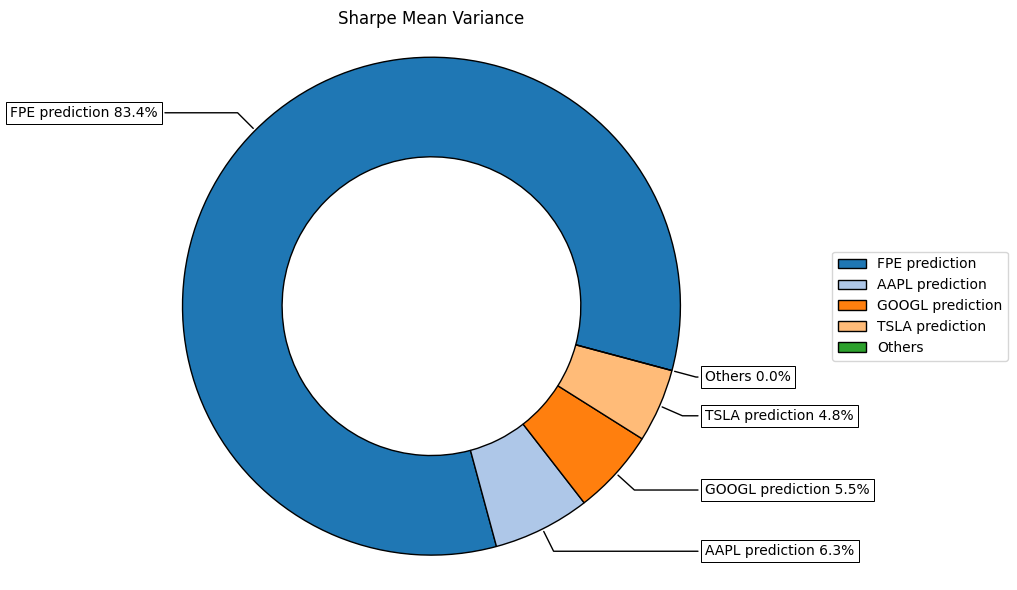

In [12]:
data_tickers_prediction_optimisation_overall = data_tickers_prediction_optimisation_overall_save.copy()
data_tickers_prediction_optimisation_overall[data_tickers_prediction_optimisation_overall.columns.drop("Date")] = data_tickers_prediction_optimisation_overall[data_tickers_prediction_optimisation_overall.columns.drop("Date")].pct_change()
data_tickers_prediction_optimisation_overall = data_tickers_prediction_optimisation_overall.dropna()
data_tickers_prediction_optimisation_overall = data_tickers_prediction_optimisation_overall.set_index("Date")

portfolio = rpf.Portfolio(returns = data_tickers_prediction_optimisation_overall)
method_mu="hist" 
method_cov="hist"
portfolio.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.95)
model="Classic" # + "BL" --> list and loop over
rm = "MV" # + "SLPM" --> list and loop over
obj = "Sharpe"
hist = True
rf = 0
l = 0
tickers_weight_prediction = portfolio.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
ax1 = rpf.plot_pie(w=tickers_weight_prediction, title="Sharpe Mean Variance", others=0.01, nrow=20, cmap = "tab20", height=6, width=10, ax=None)

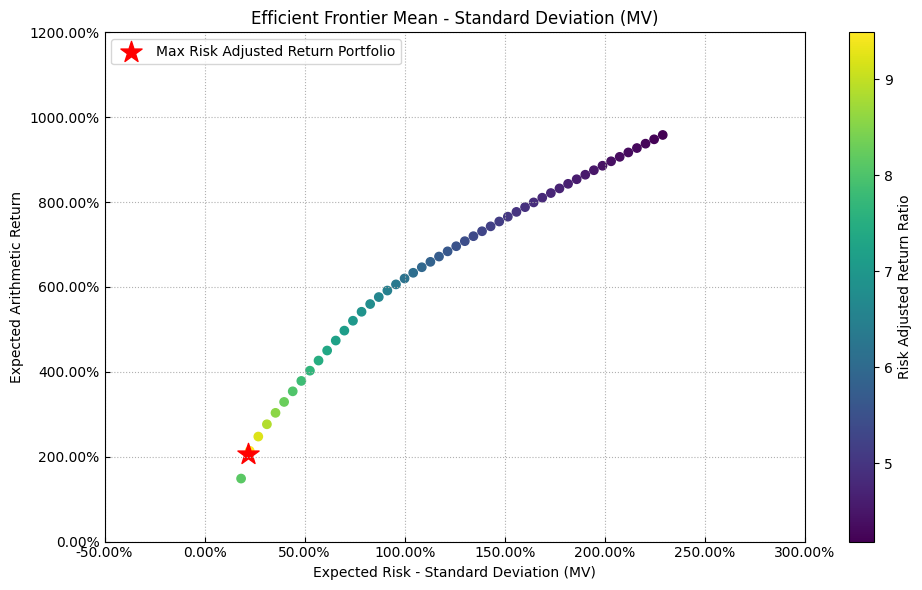

In [13]:
points = 50
frontier = portfolio.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
label = 'Max Risk Adjusted Return Portfolio'
mu = portfolio.mu
cov = portfolio.cov
returns = portfolio.returns
ax2 = rpf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05, cmap='viridis', w=tickers_weight_prediction, 
                        label=label, marker='*', s=16, c='r', height=6, width=10, ax=None)

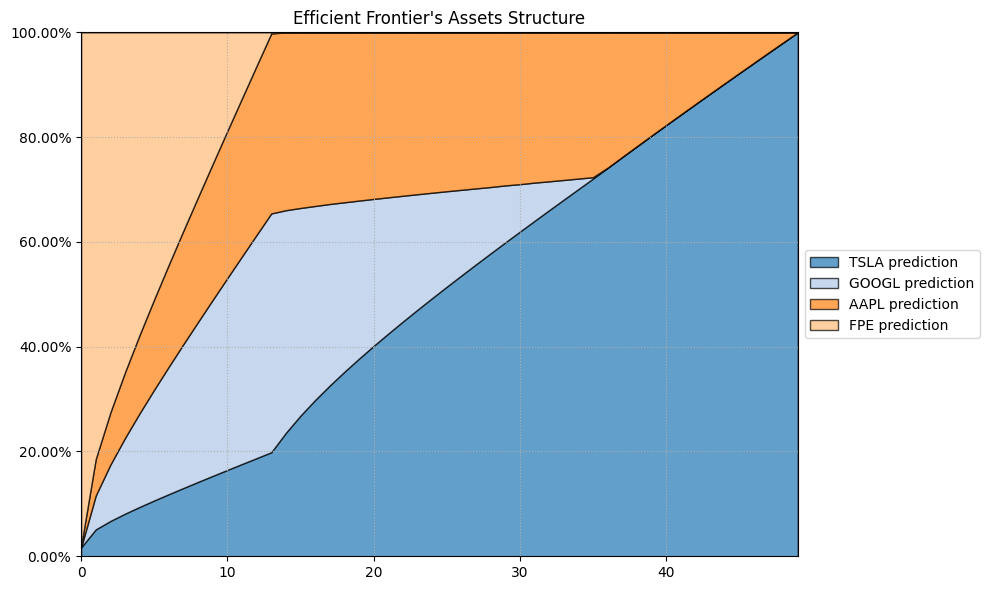

In [14]:
ax3 = rpf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

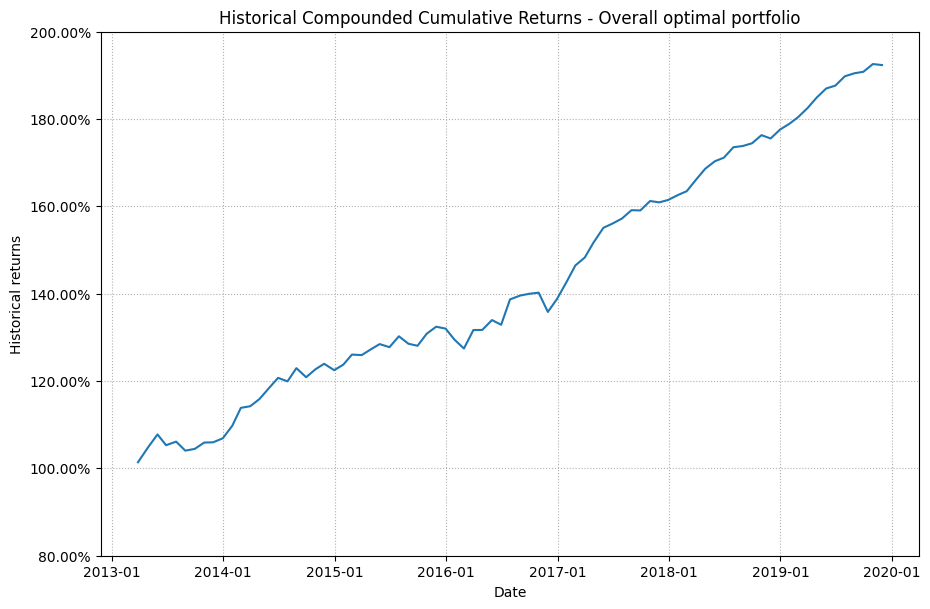

In [15]:
# Create a chart with the compound cumulated of the optimal portfolio.
ax_hr_past = rpf.plot_series(returns=data_tickers_prediction_optimisation_overall, w=tickers_weight_prediction, cmap='tab20', height=6, width=10,
                    ax=None)
ax_hr_past.set_title("Historical Compounded Cumulative Returns - Overall optimal portfolio")
ax_hr_past.get_legend().remove()
ax_hr_past.set_ylabel("Historical returns")
ax_hr_past.set_xlabel("Date")
# set y-ticks to %
vals = ax_hr_past.get_yticks()
ax_hr_past.set_yticklabels(['{:,.2%}'.format(x) for x in vals]);

## Portfolio Tickers Overall Optimisation 

/home/tania/becode/time-series/venv/lib/python3.10/site-packages/riskfolio/PlotFunctions.py:569: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


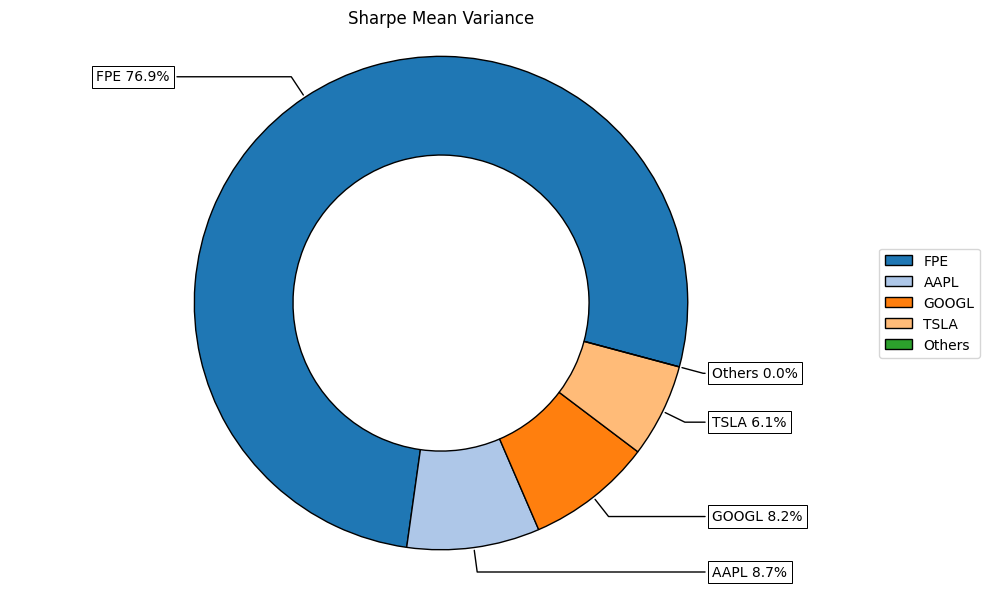

In [16]:
data_tickers_optimisation_overall = data_tickers_optimisation_overall_save.copy()
data_tickers_optimisation_overall[data_tickers_optimisation_overall.columns.drop("Date")] = data_tickers_optimisation_overall[data_tickers_optimisation_overall.columns.drop("Date")].pct_change()
data_tickers_optimisation_overall = data_tickers_optimisation_overall.dropna()
data_tickers_optimisation_overall = data_tickers_optimisation_overall.set_index("Date")

portfolio = rpf.Portfolio(returns = data_tickers_optimisation_overall)
method_mu="hist" 
method_cov="hist"
portfolio.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.95)
model="Classic" # + "BL" --> list and loop over
rm = "MV" # + "SLPM" --> list and loop over
obj = "Sharpe"
hist = True
rf = 0
l = 0
tickers_weight_overall = portfolio.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
ax1 = rpf.plot_pie(w=tickers_weight_overall, title="Sharpe Mean Variance", others=0.01, nrow=20, cmap = "tab20", height=6, width=10, ax=None)

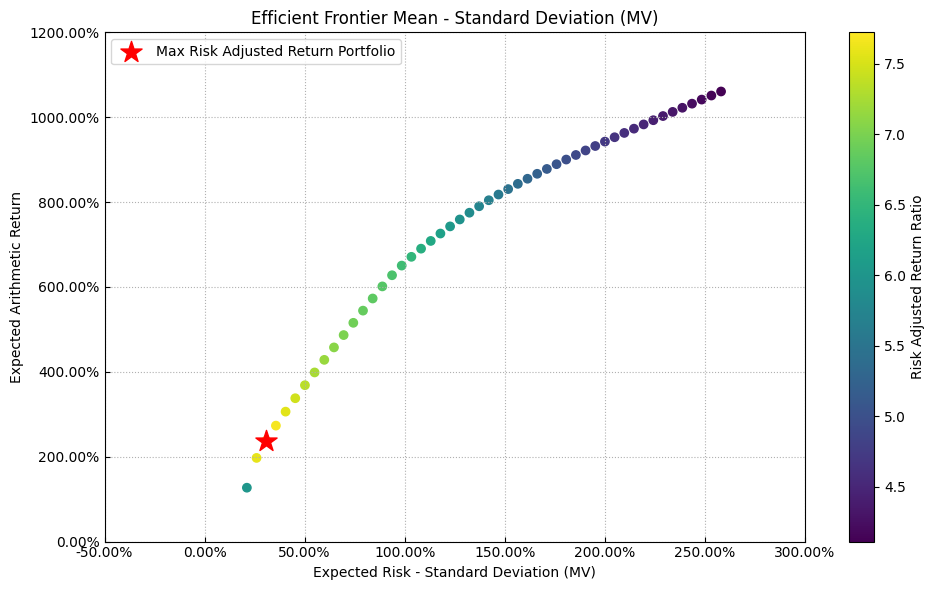

In [17]:
points = 50
frontier = portfolio.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
label = 'Max Risk Adjusted Return Portfolio'
mu = portfolio.mu
cov = portfolio.cov
returns = portfolio.returns
ax2 = rpf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05, cmap='viridis', w=tickers_weight_overall, 
                        label=label, marker='*', s=16, c='r', height=6, width=10, ax=None)

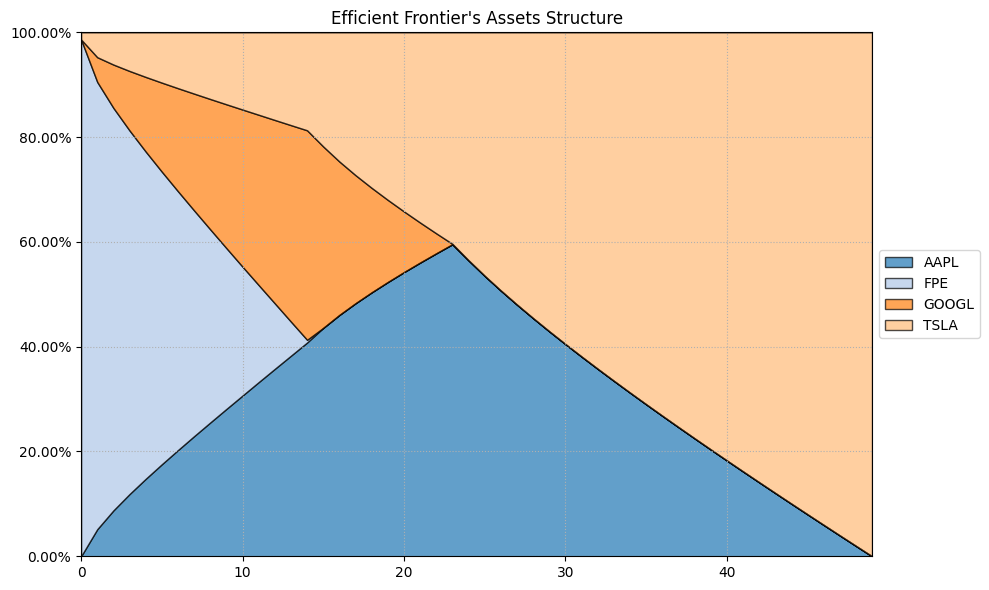

In [18]:
ax3 = rpf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

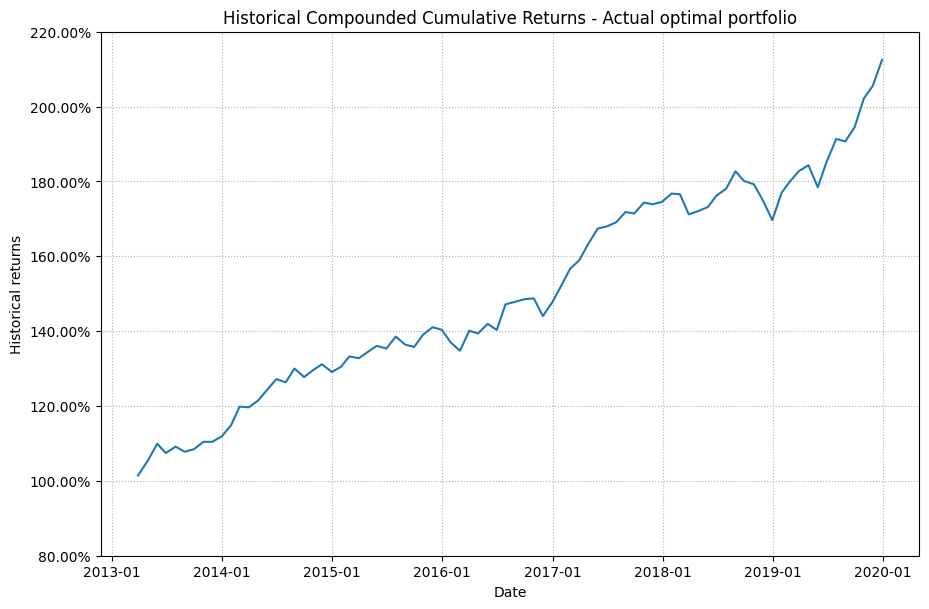

In [19]:
# Create a chart with the compound cumulated of the optimal portfolio.
ax_hr_past = rpf.plot_series(returns=data_tickers_optimisation_overall, w=tickers_weight_overall, cmap='tab20', height=6, width=10,
                    ax=None)
ax_hr_past.set_title("Historical Compounded Cumulative Returns - Actual optimal portfolio")
ax_hr_past.get_legend().remove()
ax_hr_past.set_ylabel("Historical returns")
ax_hr_past.set_xlabel("Date")
# set y-ticks to %
vals = ax_hr_past.get_yticks()
ax_hr_past.set_yticklabels(['{:,.2%}'.format(x) for x in vals]);

<AxesSubplot: title={'center': 'Optimal Portfolio Historical Compounded Cumulative Returns'}, xlabel='Date', ylabel='Historical returns'>

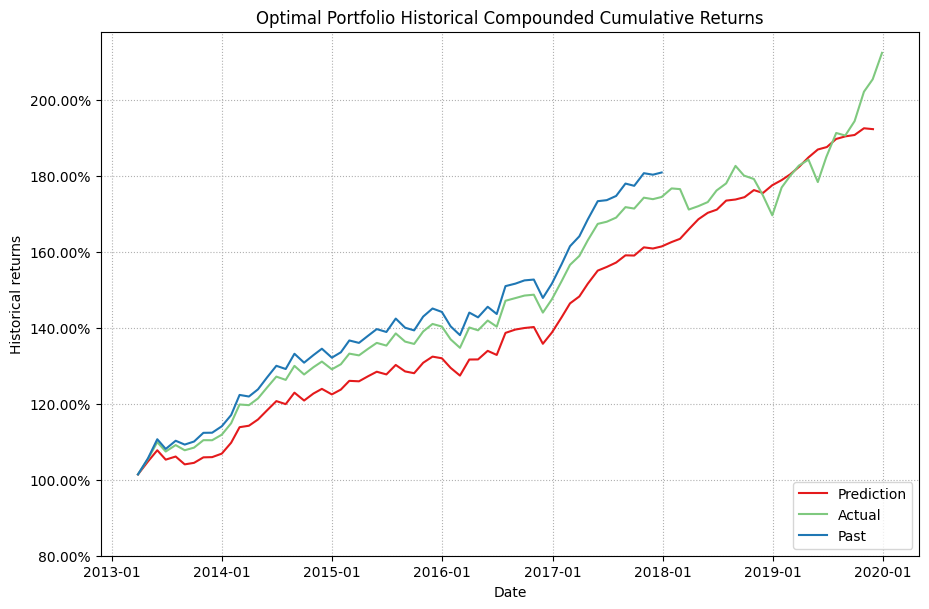

In [20]:
fig, ax_test = plt.subplots()
ax_hr_past = rpf.plot_series(returns=data_tickers_prediction_optimisation_overall, w=tickers_weight_prediction, cmap='Set1', height=6, width=10,
                    ax=None)
ax_test = rpf.plot_series(returns=data_tickers_optimisation_overall, w=tickers_weight_overall, cmap='Accent', height=6, width=10,
                    ax=None)
ax_test = rpf.plot_series(returns=data_tickers_optimisation_past, w=tickers_weight_past, cmap='tab20', height=6, width=10,
                    ax=None)
handles, labels = ax_test.get_legend_handles_labels()
labels = ['Prediction', 'Actual', 'Past']
ax_test.legend(handles, labels, loc='lower right')
ax_test.set_ylabel("Historical returns")
ax_test.set_xlabel("Date")
# set y-ticks to %
vals = ax_test.get_yticks()
ax_test.set_yticklabels(['{:,.2%}'.format(x) for x in vals]);
ax_hr_past.set_title("Optimal Portfolio Historical Compounded Cumulative Returns")
ax_test